<a href="https://colab.research.google.com/github/aiguozhe01/DIC_Assignment/blob/master/Sprint_19_copied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint セグメンテーション1

* データセット：[TGS Salt Identification Challenge | Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge)
* セグメンテーション手法：U1 [zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)

In [56]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import time

from IPython import display

In [2]:
#GPUに接続しているか確認
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [4]:
pwd

'/content'

In [5]:
cd '/content/drive/My Drive/DIC/Git/'

/content/drive/My Drive/DIC/Git


In [ ]:
!git clone https://github.com/zhixuhao/unet.git

In [6]:
cd '/content/drive/My Drive/DIC/dataset/TGS_Salt_Identification/train/'

/content/drive/My Drive/DIC/dataset/TGS_Salt_Identification/train


In [ ]:
for path, subdirs, files in os.walk(TRAIN_PATH):
  for name in sorted(files):
    print(name)

In [8]:
# 画像を配列に保存
images = []
masks = []

TRAIN_PATH = '/content/drive/My Drive/DIC/dataset/TGS_Salt_Identification/train/'

for path, subdirs, files in os.walk(TRAIN_PATH):
    for name in sorted(files):
      if '.png' in name:
        im = PIL.Image.open(os.path.join(path, name))
        if 'images' in path:
          images.append(im)  
        if 'masks' in path:
          masks.append(im)

In [9]:
train_df = pd.read_csv('/content/drive/My Drive/DIC/dataset/TGS_Salt_Identification/train.csv')

train_df["images"] = [np.array(PIL.Image.open("./images/{}.png".format(idx))) / 255 for idx in train_df.id]
train_df["masks"] = [np.array(PIL.Image.open("./masks/{}.png".format(idx))) / 255 for idx in train_df.id]

In [24]:
train_df.head()

,id,rle_mask,images,masks
0,2c45b152f1,99 3 197 6 295 9 395 10 494 12 594 13 694 14 7...,"[[[0.3411764705882353, 0.3411764705882353, 0.3...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,3cb59a4fdc,1 5656,"[[[0.45098039215686275, 0.45098039215686275, 0...","[[257.0, 257.0, 257.0, 257.0, 257.0, 257.0, 25..."
2,e185ab5dc1,4647 2 4748 10 4849 18 4950 25 5051 29 5152 34...,"[[[0.4666666666666667, 0.4666666666666667, 0.4...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,c78c89577c,101 1,"[[[0.3411764705882353, 0.3411764705882353, 0.3...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,6306dd3a8e,1 30 102 29 203 29 304 28 405 27 506 27 607 26...,"[[[0.5490196078431373, 0.5490196078431373, 0.5...","[[257.0, 257.0, 257.0, 257.0, 257.0, 257.0, 25..."


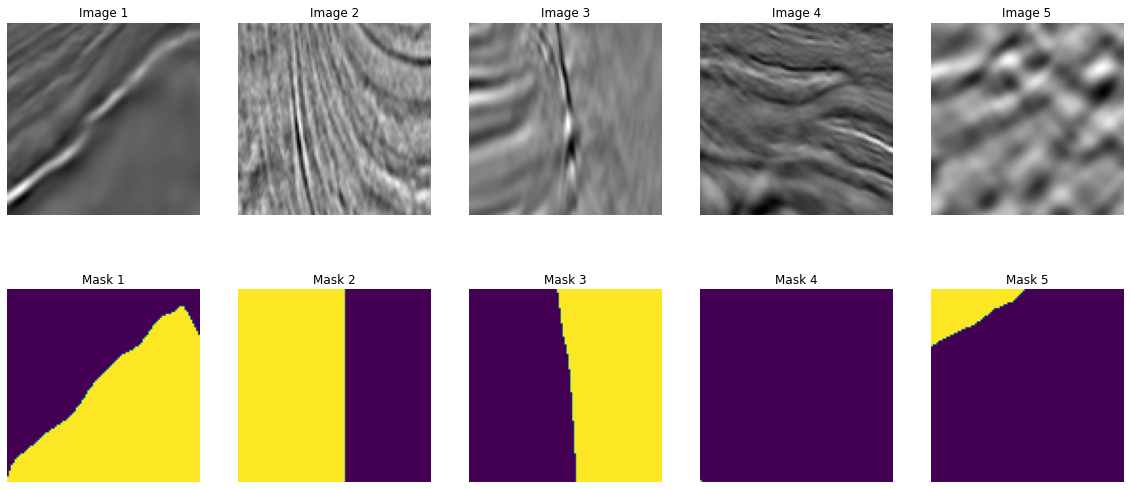

In [10]:
fig = plt.figure(figsize=(20,9))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_df.loc[i, 'images'])
    plt.axis('off')
    plt.title('Image {}'.format(i+1))

    plt.subplot(2, 5, i+6)
    plt.imshow(train_df.loc[i, 'masks'])
    plt.axis('off')
    plt.title('Mask {}'.format(i+1))

In [11]:
cd /content/drive/My Drive/DIC/Git/unet

/content/drive/My Drive/DIC/Git/unet


In [12]:
mkdir ./data/segment_salt

In [14]:
mv '/content/drive/My Drive/DIC/dataset/TGS_Salt_Identification/train/' ./data/segment_salt

In [15]:
cd /content/drive/My Drive/DIC/Git/unet/data/segment_salt

/content/drive/My Drive/DIC/Git/unet/data/segment_salt


In [16]:
mv ./train/images/ ./train/image/

In [17]:
mv ./train/masks/ ./train/label/

In [18]:
cd /content/drive/My Drive/DIC/Git/unet

/content/drive/My Drive/DIC/Git/unet


In [19]:
mv '/content/drive/My Drive/DIC/dataset/TGS_Salt_Identification/test/' ./data/segment_salt

In [20]:
mv ./data/segment_salt/test/images ./data/segment_salt/test/image

In [21]:
cd /content/drive/My Drive/DIC/Git/unet

/content/drive/My Drive/DIC/Git/unet


In [88]:
!python3 -m pip install --upgrade Tensorflow

Requirement already up-to-date: Tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [78]:
!python3 -m pip freeze

absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.2.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.2.1
blis==0.4.1
bokeh==2.1.1
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.3
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
debugpy==1.0.0rc2
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.2
distributed==1.25.3
Django==3.1.1
dlib==19.18.0
dm-tree==0.1.5
docopt==0

In [79]:
from model import *
from data import *

In [82]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/segment_salt/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_salt.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=1000,epochs=5,callbacks=[model_checkpoint])

TypeError: ignored

In [59]:
def samp(test_path,num_image = 30,target_size = (256,256),flag_multi_class = False,as_gray = True):
    files = os.listdir(test_path)
    for i in range(num_image):
      img = io.imread(os.path.join(test_path,files[i]),as_gray = as_gray)
      img = img / 255
      img = trans.resize(img,target_size)
      img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
      img = np.reshape(img,(1,)+img.shape)
      yield img

In [60]:
mkdir ./data/segment_salt/test/predict

In [61]:
testGene = testGenerator("./data/segment_salt/test/image")
model = unet()
model.load_weights("unet_salt.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/segment_salt/test/predict/",results)

TypeError: ignored

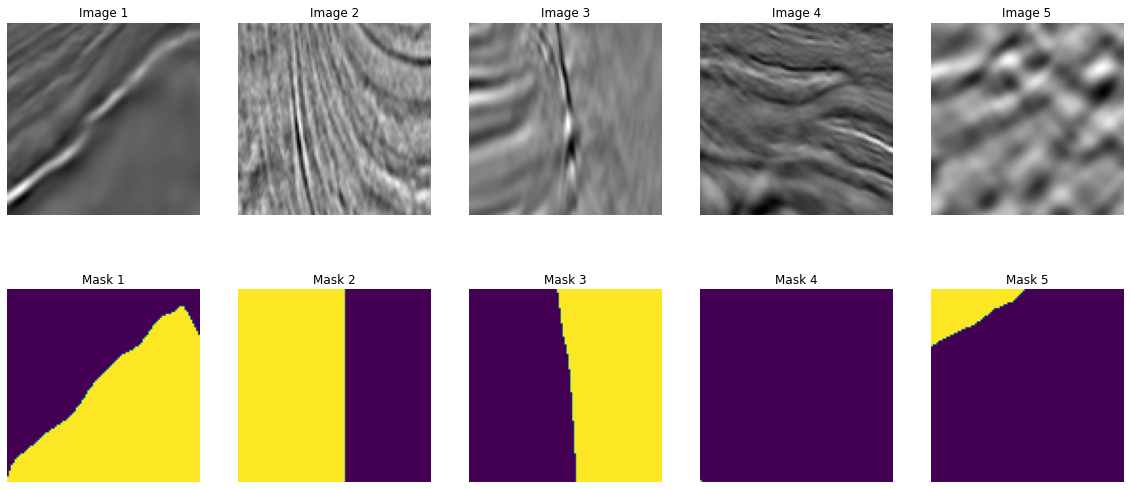

In [62]:
for path, subdirs, files in os.walk(TRAIN_PATH):
    for name in sorted(files):
      if '.png' in name:
        im = PIL.Image.open(os.path.join(path, name))
        if 'images' in path:
          images.append(im)  
        if 'masks' in path:
          masks.append(im)  

fig = plt.figure(figsize=(20,9))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_df.loc[i, 'images'])
    plt.axis('off')
    plt.title('Image {}'.format(i+1))

    plt.subplot(2, 5, i+6)
    plt.imshow(train_df.loc[i, 'masks'])
    plt.axis('off')
    plt.title('Mask {}'.format(i+1))

## 【問題2】コードリーディング

* 上記実装を行い、tensorflow1.x と2.xによって、仕様が大分変更されていることが確認される。google collab上でmodel.pyのModelのデバグは未だ不明である。